In [1]:
API_KEY = 'YOUR_API_KEY'

In [2]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
from googletrans import Translator
translator = Translator()

In [4]:
from pyyoutube import Api
import json
api = Api(api_key=API_KEY)

In [17]:
positive, negative = 0, 0

ct_by_video = api.get_comment_threads(
    video_id="dIUTsFT2MeQ", count=30, return_json=True, order='relevance')
for item in ct_by_video['items']:
    comment = item["snippet"]["topLevelComment"]["snippet"]["textOriginal"]
    translation = translator.translate(comment, dest='en')
    rating_trans = sent_pipeline(translation.text)
    if rating_trans[0]["label"] == 'POSITIVE': positive += 1
    else: negative += 1
    print('Original: {}\n\nTranslated: {}\nRating {}\n\n'.format(comment, translation.text, rating_trans[0]["label"]))

print(positive, negative)

Original: Yes! Please, definitely make a second part. I teach in the Humanities (college literature and creative writing classes), and I'm actively searching for tools I can use for creative experiments with texts.

Translated: Yes! Please, definitely make a second part. I teach in the Humanities (college literature and creative writing classes), and I'm actively searching for tools I can use for creative experiments with texts.
Rating POSITIVE


Original: Thank you very much for making this video. I want to create my own corpus to analyze data. But as a newbie to Python, I found it really hard to start without a clear direction. Looking forward to Part 2!

Translated: Thank you very much for making this video. I want to create my own corpus to analyze data. But as a newbie to Python, I found it really hard to start without a clear direction. Looking forward to Part 2!
Rating NEGATIVE


Original: Very very helpful stuff! 31 minutes in the video and I'm already using spacy for my own an

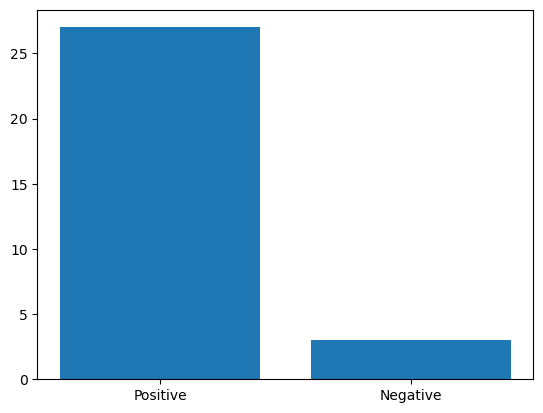

In [18]:
import matplotlib.pyplot as plt
plt.bar(["Positive", "Negative"], [positive, negative])
plt.show()